In [40]:
import os
from typing import Callable

import pandas as pd
import matplotlib.pyplot as plt
import requests
import tiktoken

def read_url(url: str) -> str:
    response: requests.Response = requests.get(url)
    text: str = response.content.decode("utf-8")
    return text

def read_file(path: str) -> str:
    with open(path, mode="r", encoding="utf-8") as file:
        return file.read()

def faust(url: str) -> str:
    text: str = read_url(url)
    lines: list[str] = text.splitlines()
    return "\n".join(lines[69:7184])

def _ratio(text: str, encoding_name: str) -> float:
    encoding: tiktoken.Encoding = tiktoken.get_encoding(encoding_name)
    num_tokens: int = len(encoding.encode(text))
    num_chars: int = len(text)
    return num_chars / num_tokens

def plot(x,y, label_y: str, title: str) -> None:
    plt.figure(figsize=(10, 6), dpi=300)
    plt.bar(x, y)
    plt.ylabel(label_y)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()

In [41]:
# In this analysis, we calculate the character-to-token ratio for different languages.
# For the programming languages, the repositories from the GitHub project https://github.com/TheAlgorithms were used.
# Using merge_files.py, we combined the code of each repo into a single file.

data: list[tuple[str, Callable, str]] = [
    ("German", faust, "https://www.gutenberg.org/files/2229/2229-0.txt"),
    ("English", read_url, "https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt"),
    ("Python", read_file, os.path.join("playground", "data", "py.txt")),
    ("C", read_file, os.path.join("playground", "data", "c.txt")),
    ("C-Plus-Plus", read_file, os.path.join("playground", "data", "cpp.txt")),
    ("JavaScript", read_file, os.path.join("playground", "data", "js.txt")),
    ("Go", read_file, os.path.join("playground", "data", "go.txt")),
    ("Java", read_file, os.path.join("playground", "data", "java.txt"))
]

ENCODING_P50K_BASE: str = "p50k_base"
ENCODING_CL100K_BASE: str = "cl100k_base"

ratios: list[dict] = []
for element in data:
    language, func, url = element
    text: str = func(url)
    ratio_50: float = _ratio(text, ENCODING_P50K_BASE)
    ratio_100: float = _ratio(text, ENCODING_CL100K_BASE)
    ratios.append({"language": language, "p50k_base": ratio_50, "cl100k_base": ratio_100})

df: pd.DataFrame = pd.DataFrame(ratios)
df["abs_change"] = abs(df['cl100k_base'] - df['p50k_base'])

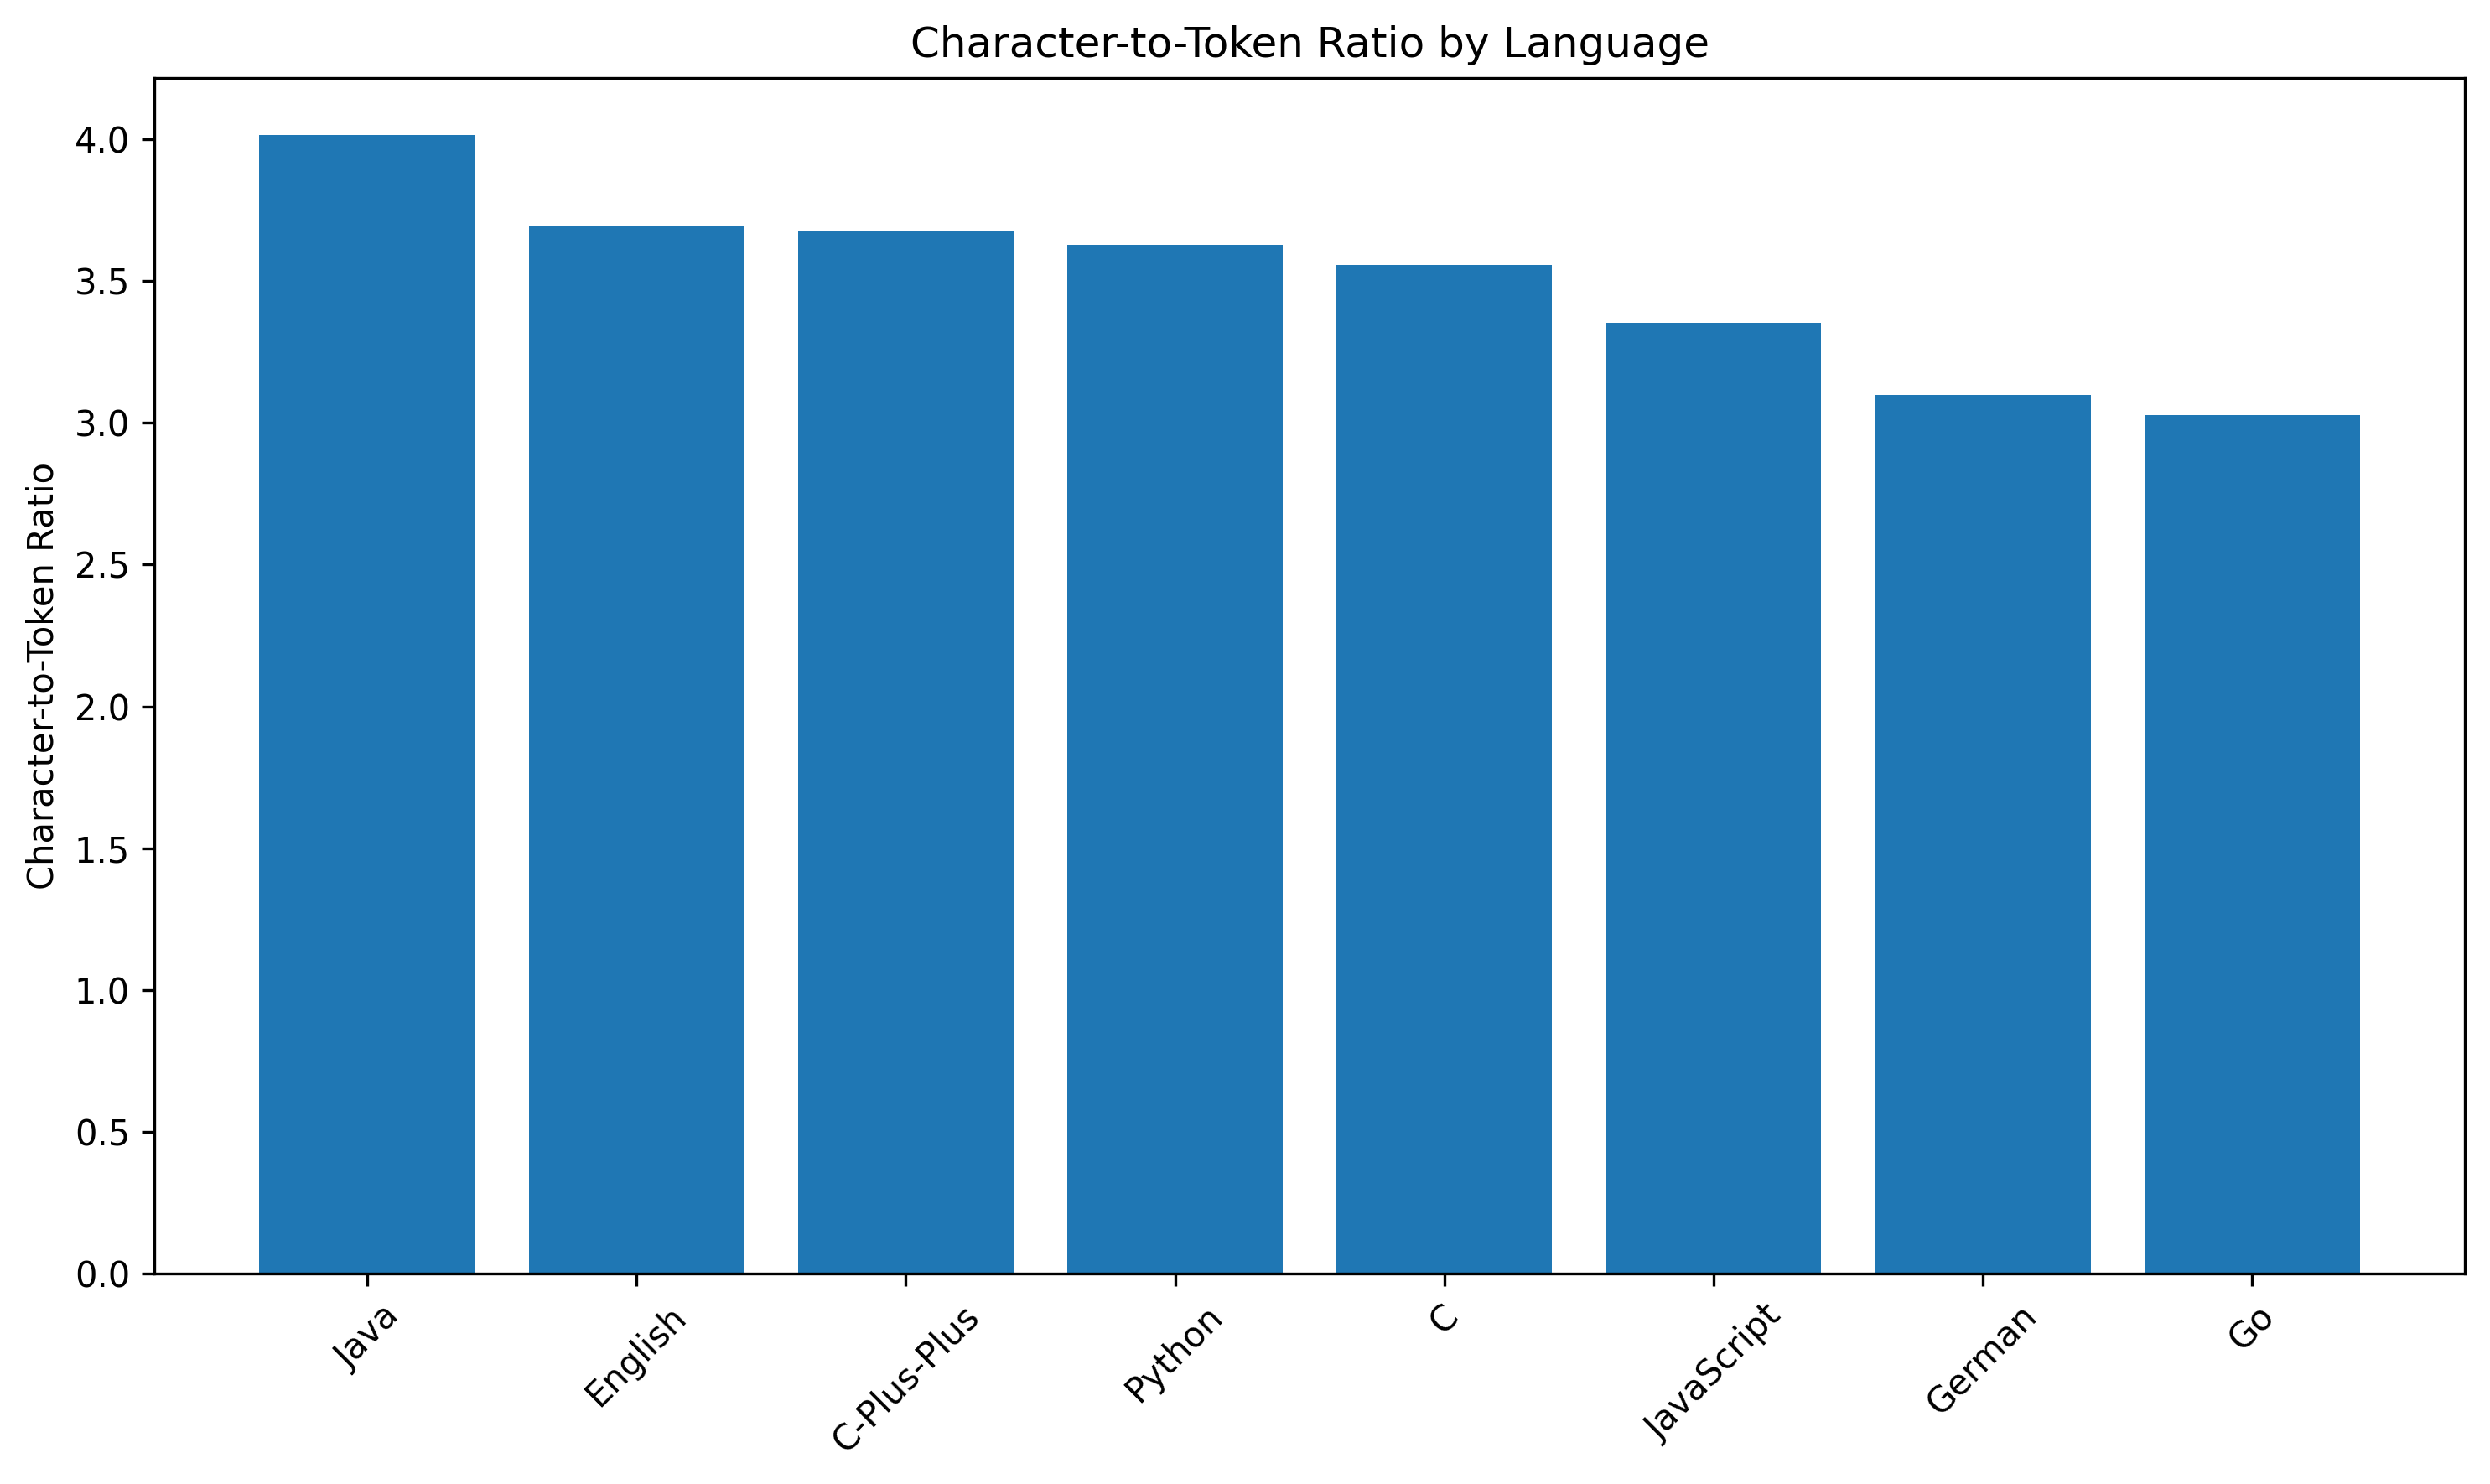

In [42]:
df: pd.DataFrame = df.sort_values(by="cl100k_base", ascending=False)
x: pd.Series = df["language"]
y: pd.Series = df["cl100k_base"]
plot(x, y, "Character-to-Token Ratio", "Character-to-Token Ratio by Language")

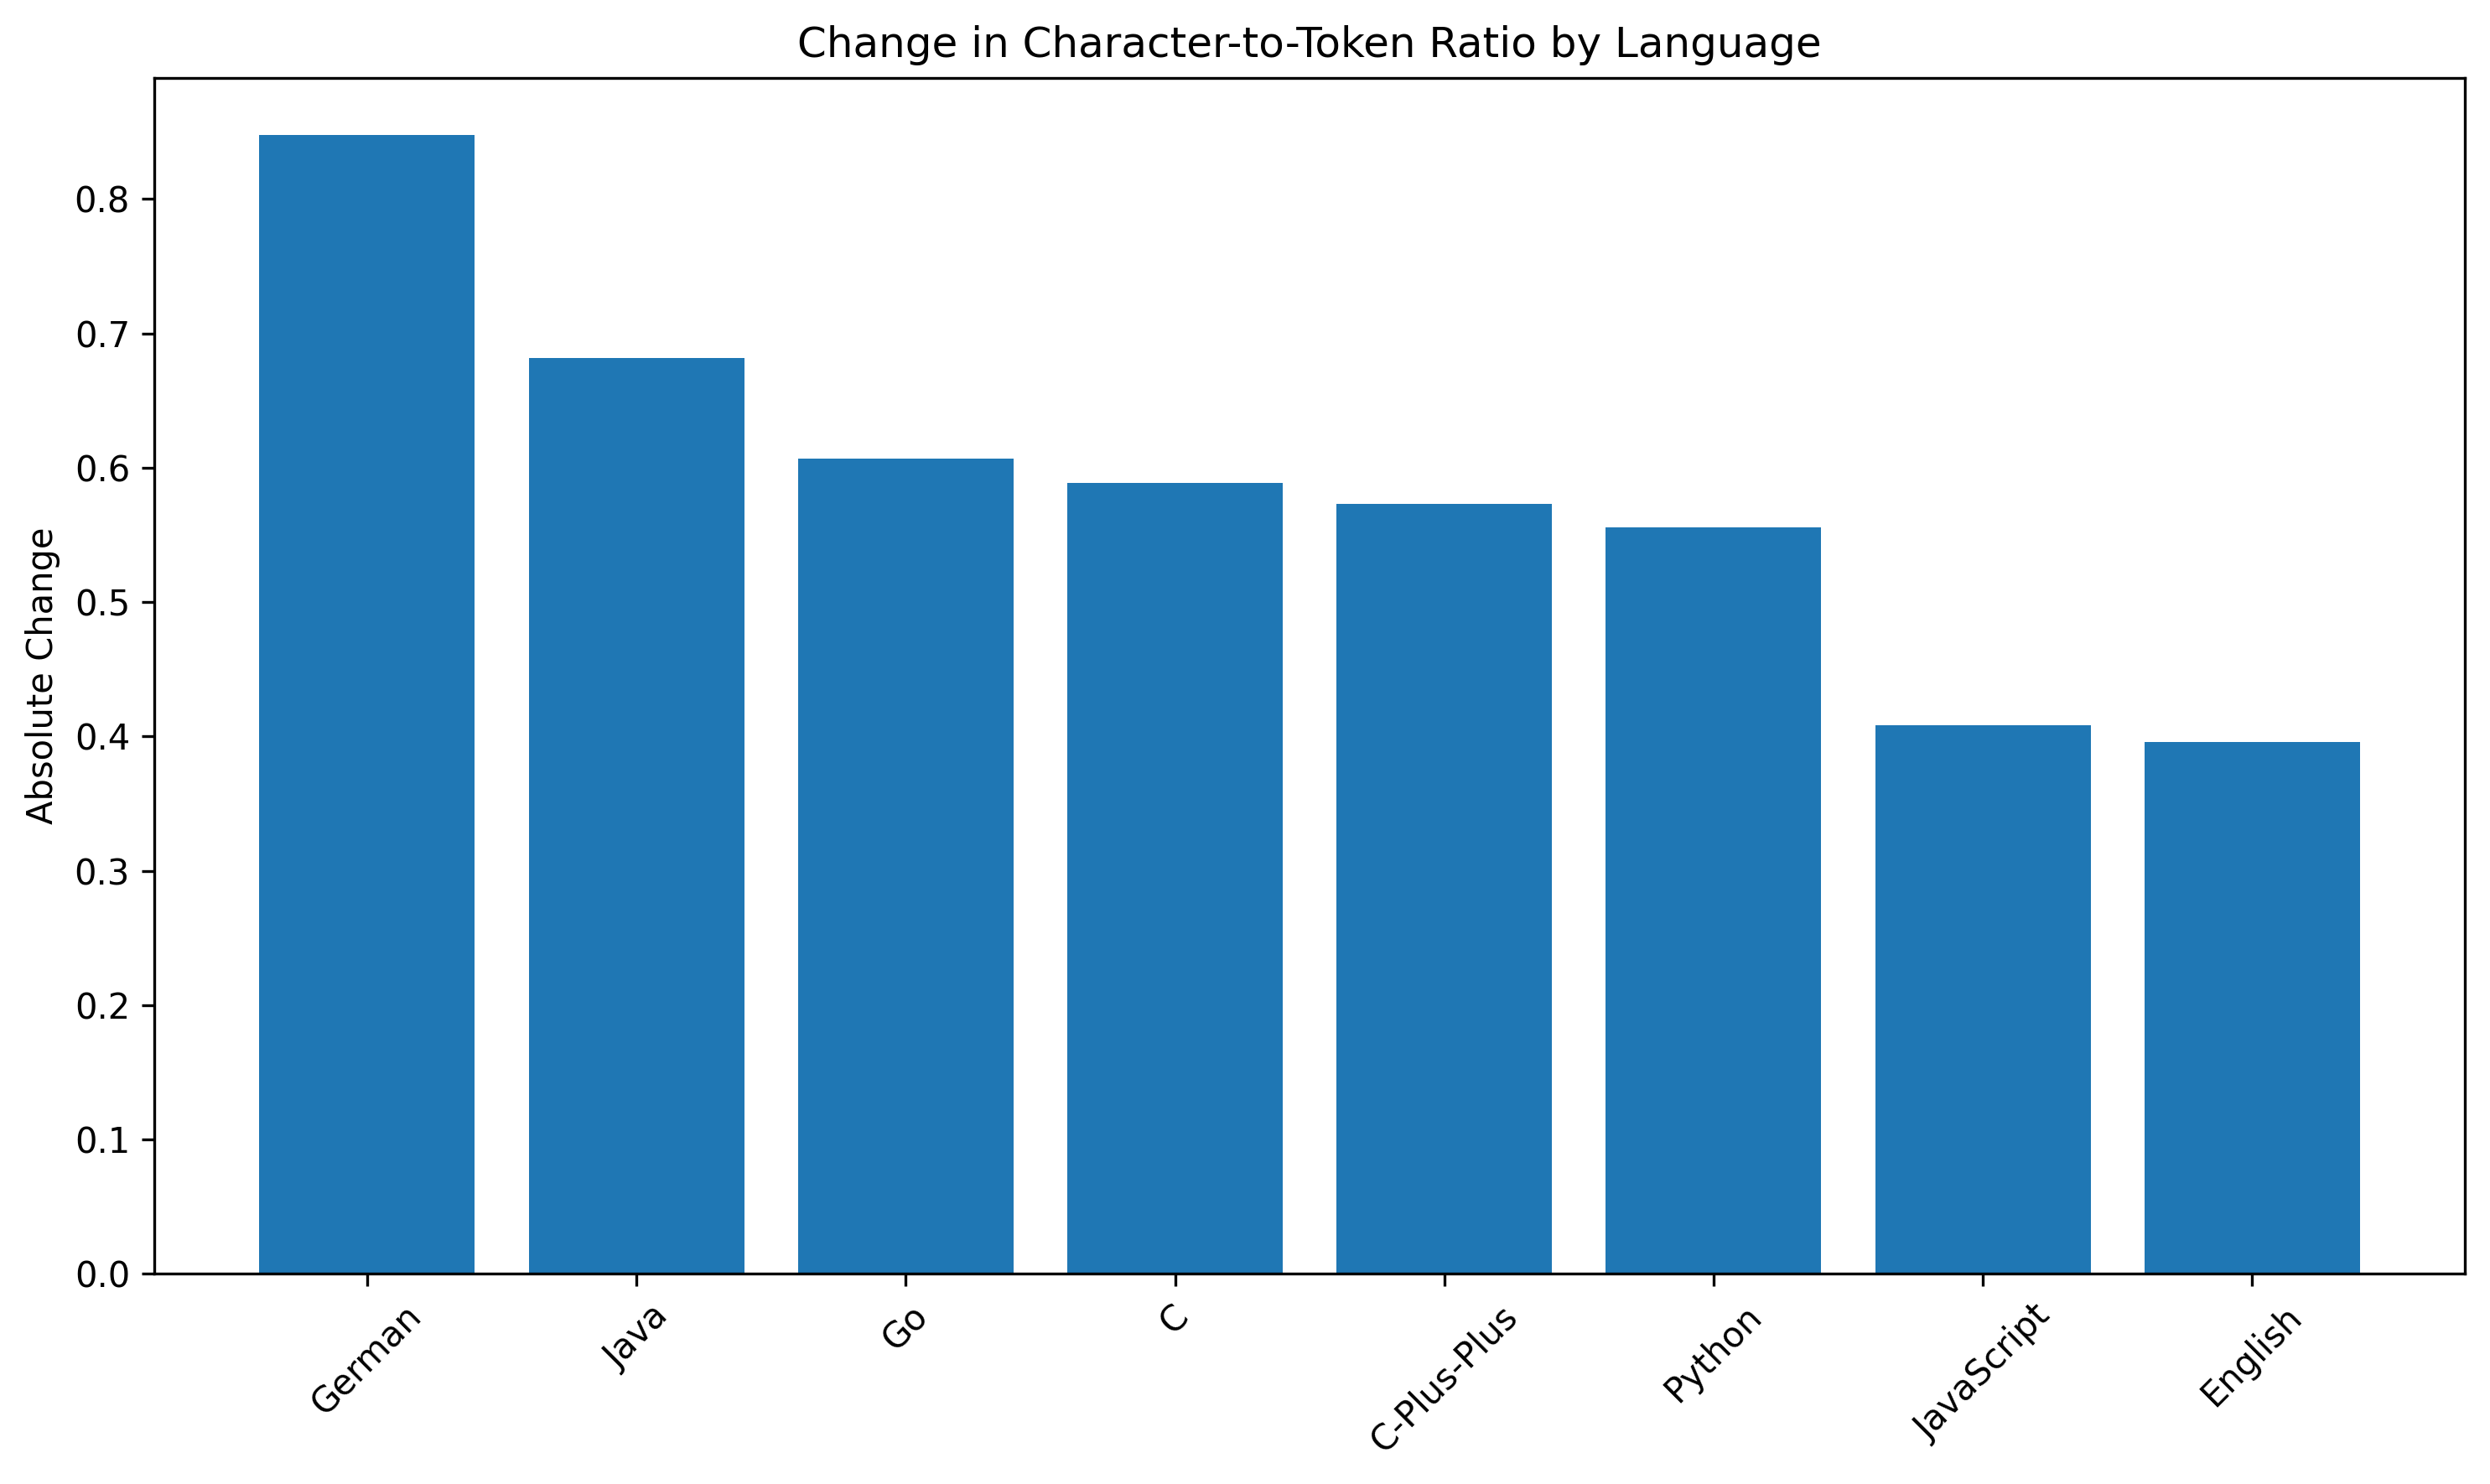

In [43]:
df: pd.DataFrame = df.sort_values(by='abs_change', ascending=False)
x: pd.Series = df['language']
y: pd.Series = df['abs_change']
plot(x,y, "Absolute Change", "Change in Character-to-Token Ratio by Language")